In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd

In [2]:
url = "https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY"
page = requests.get(url)

In [3]:
page

<Response [200]>

In [4]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.066267.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><l

In [5]:
soup = BeautifulSoup(page.text)

In [6]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.066267.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><l

In [72]:
Brands = []
kg = []
Star = []
Operation = []
warranty = []
rpm = []
Prices = []
rating=[]
Ld = []

for i in range(1,41):
    print("https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page="+str(i))
    urls = "https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page="+str(i)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    Price = soup.find_all("div",class_="Nx9bqj _4b5DiR")

    for i in Price:
        Prices.append(i.text)

    Models = soup.find_all("div",class_="KzDlHZ")

    for i in Models:
        Brands.append(i.text.split()[0])

    for i in Models:
        a = re.findall(r"(\d+\.\d+)\skg",i.text)
        b = re.findall(r"(\d+)\skg",i.text)
        c = re.findall(r"(\d+/\d+)\skg",i.text)
        d = re.findall(r"(\d+\.\d+/\d+\.\d+)\skg",i.text)
        if len(a) > 0:
            kg.append(a[0])
        elif len(b) > 0:
            kg.append(b[0])
        elif len(c) > 0:
            kg.append(c[0])
        elif len(d) > 0:
            kg.append(d[0])
        else:
            kg.append(np.nan)

    for i in Models:
        a = re.findall(r"(\d+)\sStar",i.text)
        if len(a) > 0:
            Star.append(a[0])
        else:
            Star.append(np.nan)
            
    Model = soup.find_all("li",class_="J+igdf")

    for i in Model:
        a = re.findall(r"(\d+)\s[rpmRPM]",i.text)
        if len(a) > 0:
            rpm.append(a[0])

    product_blocks = soup.find_all("div", class_="tUxRFH")
    
    for block in product_blocks:
        li_tags = block.find_all("li", class_="J+igdf")
        found = False
        for li in li_tags:
            match = re.findall(r"(\d+\s(?:Year|Years|year|years))", li.text)
            if match:
                warranty.append(match[0])
                found = True
                break
        if not found:
            warranty.append(np.nan)
            

 
    rating_divs = soup.find_all("div", class_="XQDdHH")

    page_ratings = []
    for r in rating_divs:
        match = re.findall(r"^\d+(\.\d+)?$", r.text.strip())
        if match or re.match(r"^\d+(\.\d+)?$", r.text.strip()):
            page_ratings.append(r.text.strip())
    
    while len(page_ratings) < 24:
        page_ratings.append(np.nan)
    rating.extend(page_ratings[:24])


    Models = soup.find_all("div",class_="KzDlHZ")

    for i in Models:
        a = re.findall(r"Semi Automatic",i.text)
        if len(a) > 0:
            Operation.append('Semi Automatic')
        else:
            Operation.append('Fully Automatic')

    Models = soup.find_all("div", class_="KzDlHZ")
    
    for i in Models:
        a = re.findall(r"(front load|top load)", i.text.lower())
        if a:
            Ld.append(a[0].title())   
        else:
            Ld.append(np.nan)


https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=1
https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=2
https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=3
https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=4
https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=5
https://www.flipkart.com/search?q=washing+machine+&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=6
https://www.flipkart.com/search?q=washing+machine+&otracker=search&otr

In [88]:
d = {"Brand":Brands,
    "KG":kg,
    "Star Rating":Star,
    "Automation_Type":Operation,
    "Warranty":warranty,
    "RPM Max Speed":rpm,
    "Price":Prices,
    "Rating":rating,
    "Load_Type":Ld}

In [90]:
df = pd.DataFrame(d)

In [92]:
df.to_csv("result.csv")

In [103]:
df = pd.read_csv(r"result.csv")
df

,Unnamed: 0,Brand,KG,Star Rating,Automation_Type,Warranty,RPM Max Speed,Price,Rating,Load_Type
0,0,IFB,9.0,5.0,Fully Automatic,4 Year,1400,"₹38,490",4.3,NaN
1,1,IFB,6.0,5.0,Fully Automatic,4 Year,1000,"₹24,990",4.3,NaN
2,2,Samsung,8.0,NaN,Semi Automatic,2 year,1300,"₹11,890",4.4,Top Load
3,3,realme,7.0,5.0,Semi Automatic,2 Year,1400,"₹7,990",4.2,Top Load
4,4,realme,10.0,NaN,Semi Automatic,2 Year,1300,"₹10,490",4.2,Top Load
...,...,...,...,...,...,...,...,...,...,...
955,955,Lloyd,8.0,NaN,Semi Automatic,2 year,1320,"₹13,888",4.0,Top Load
956,956,Haier,9.0,NaN,Fully Automatic,1 year,1400,"₹40,261",5.0,Front Load
957,957,LG,7.0,NaN,Fully Automatic,2 Year,1200,"₹37,990",4.2,Front Load
958,958,White,9.0,NaN,Semi Automatic,2 Year,1400,"₹10,999",5.0,Top Load


In [104]:
#Data Cleaning

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       960 non-null    int64  
 1   Brand            960 non-null    object 
 2   KG               948 non-null    float64
 3   Star Rating      374 non-null    float64
 4   Automation_Type  960 non-null    object 
 5   Warranty         943 non-null    object 
 6   RPM Max Speed    960 non-null    int64  
 7   Price            960 non-null    object 
 8   Rating           960 non-null    float64
 9   Load_Type        579 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 75.1+ KB


In [106]:
df['Price'] = df['Price'].str.replace("₹","").str.replace(",","")

In [107]:
df['Price'] = df['Price'].astype('int32')

In [108]:
df = df.drop(['Unnamed: 0'], axis=1)

In [109]:
df['Warranty'] = df['Warranty'].str.extract(r'(\d+)').astype(float)

In [110]:
df.columns = ['Brand', 'Capacity_kg', 'Star_Rating', 'Automation_Type',
              'Warranty_Years', 'RPM', 'Price', 'Customer_Rating', 'Load_Type']

In [111]:
df = df.dropna(subset=['Brand', 'Price'])

In [119]:
df.reset_index(drop=True, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            960 non-null    object 
 1   Capacity_kg      948 non-null    float64
 2   Star_Rating      374 non-null    float64
 3   Automation_Type  960 non-null    object 
 4   Warranty_Years   943 non-null    float64
 5   RPM              960 non-null    int64  
 6   Price            960 non-null    int32  
 7   Customer_Rating  960 non-null    float64
 8   Load_Type        579 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 63.9+ KB


In [114]:
df['Capacity_kg'] = df['Capacity_kg'].fillna(df['Capacity_kg'].median())

In [115]:
df['Star_Rating'] = df['Star_Rating'].fillna(df['Star_Rating'].median())

In [116]:
df['Warranty_Years'] = df['Warranty_Years'].fillna(df['Warranty_Years'].median())

In [117]:
df['Load_Type'] = df['Load_Type'].fillna(df['Load_Type'].mode()[0])

In [118]:
df.drop_duplicates(inplace=True)

In [122]:
df

,Brand,Capacity_kg,Star_Rating,Automation_Type,Warranty_Years,RPM,Price,Customer_Rating,Load_Type
0,IFB,9.0,5.0,Fully Automatic,4.0,1400,38490,4.3,Top Load
1,IFB,6.0,5.0,Fully Automatic,4.0,1000,24990,4.3,Top Load
2,Samsung,8.0,5.0,Semi Automatic,2.0,1300,11890,4.4,Top Load
3,realme,7.0,5.0,Semi Automatic,2.0,1400,7990,4.2,Top Load
4,realme,10.0,5.0,Semi Automatic,2.0,1300,10490,4.2,Top Load
...,...,...,...,...,...,...,...,...,...
736,Lloyd,8.0,5.0,Semi Automatic,2.0,1320,13888,4.0,Top Load
737,Haier,9.0,5.0,Fully Automatic,1.0,1400,40261,5.0,Front Load
738,LG,7.0,5.0,Fully Automatic,2.0,1200,37990,4.2,Front Load
739,White,9.0,5.0,Semi Automatic,2.0,1400,10999,5.0,Top Load


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            741 non-null    object 
 1   Capacity_kg      741 non-null    float64
 2   Star_Rating      741 non-null    float64
 3   Automation_Type  741 non-null    object 
 4   Warranty_Years   741 non-null    float64
 5   RPM              741 non-null    int64  
 6   Price            741 non-null    int32  
 7   Customer_Rating  741 non-null    float64
 8   Load_Type        741 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 49.3+ KB


In [135]:
df.isna().sum()

Brand              0
Capacity_kg        0
Star_Rating        0
Automation_Type    0
Warranty_Years     0
RPM                0
Price              0
Customer_Rating    0
Load_Type          0
dtype: int64

In [124]:
#Data Analysis

In [125]:
#COUNT OF EACH BRAND
df['Brand'].value_counts()

Brand
IFB             94
Samsung         84
LG              75
Whirlpool       68
Voltas          57
Haier           53
BOSCH           49
Godrej          45
Lloyd           31
Panasonic       21
ONIDA           21
realme          14
Thomson         14
Acer            12
InnoQ           11
MarQ            11
MOTOROLA        11
Siemens          6
Admiral          5
Reliance         5
White            5
Electrolux       5
TCL              4
Midea            4
VW               3
FOXSKY           3
Intex            3
BLACK+DECKER     3
Sansui           3
CANDY            2
Kenstar          2
Motorola         2
Equator          2
BPL              2
Sharp            2
Summercool       2
Kelvinator       2
TOSHIBA          2
Hafele           1
Power            1
Khaitan          1
Name: count, dtype: int64

In [126]:
#how many brands are there
df['Brand'].nunique()

41

In [129]:
#COUNT OF EACH Automation_Type
df['Automation_Type'].value_counts()

Automation_Type
Fully Automatic    499
Semi Automatic     242
Name: count, dtype: int64

In [133]:
#COUNT OF EACH 	Load_Type
df['Load_Type'].value_counts()

Load_Type
Top Load      598
Front Load    143
Name: count, dtype: int64

In [136]:
df['Price'].describe()

count       741.000000
mean      22868.363023
std       14546.746833
min        4790.000000
25%       12850.000000
50%       18000.000000
75%       29960.000000
max      149990.000000
Name: Price, dtype: float64

In [137]:
#AVERAGE PRICE OF EACH BRAND
df.groupby('Brand')['Price'].mean()

Brand
Acer            16804.250000
Admiral         12999.000000
BLACK+DECKER    20605.333333
BOSCH           34065.102041
BPL              8090.000000
CANDY            9940.000000
Electrolux      41138.000000
Equator         23245.000000
FOXSKY           7432.333333
Godrej          17490.711111
Hafele          22999.000000
Haier           26967.509434
IFB             32032.744681
InnoQ            7978.181818
Intex           15959.666667
Kelvinator      11078.000000
Kenstar          8190.000000
Khaitan         17958.000000
LG              29694.080000
Lloyd           15728.290323
MOTOROLA        16044.545455
MarQ            11180.636364
Midea           10690.000000
Motorola        24490.000000
ONIDA           11534.761905
Panasonic       24702.190476
Power            6099.000000
Reliance         5689.600000
Samsung         28950.238095
Sansui           9056.666667
Sharp            9934.500000
Siemens         45756.666667
Summercool       8514.000000
TCL             12965.000000
TOSHIBA 

In [138]:
#MIN AND MAXIMUM PRICE OF EACH BRAND
df.groupby('Brand')['Price'].agg(['mean','min','max'])

,mean,min,max
Brand,,,
Acer,16804.250000,13949,21999
Admiral,12999.000000,8999,18399
BLACK+DECKER,20605.333333,17999,24567
BOSCH,34065.102041,11990,72998
BPL,8090.000000,8080,8100
CANDY,9940.000000,8890,10990
Electrolux,41138.000000,34990,58990
Equator,23245.000000,14490,32000
FOXSKY,7432.333333,6999,7799


In [139]:
df

,Brand,Capacity_kg,Star_Rating,Automation_Type,Warranty_Years,RPM,Price,Customer_Rating,Load_Type
0,IFB,9.0,5.0,Fully Automatic,4.0,1400,38490,4.3,Top Load
1,IFB,6.0,5.0,Fully Automatic,4.0,1000,24990,4.3,Top Load
2,Samsung,8.0,5.0,Semi Automatic,2.0,1300,11890,4.4,Top Load
3,realme,7.0,5.0,Semi Automatic,2.0,1400,7990,4.2,Top Load
4,realme,10.0,5.0,Semi Automatic,2.0,1300,10490,4.2,Top Load
...,...,...,...,...,...,...,...,...,...
736,Lloyd,8.0,5.0,Semi Automatic,2.0,1320,13888,4.0,Top Load
737,Haier,9.0,5.0,Fully Automatic,1.0,1400,40261,5.0,Front Load
738,LG,7.0,5.0,Fully Automatic,2.0,1200,37990,4.2,Front Load
739,White,9.0,5.0,Semi Automatic,2.0,1400,10999,5.0,Top Load


In [143]:
#DISPLAY 8KG AND PRICE >10000 AND PRICE<30000
df[(df['Price']>10000)&(df['Price']<30000)&(df['Capacity_kg'] == 8.0)]

,Brand,Capacity_kg,Star_Rating,Automation_Type,Warranty_Years,RPM,Price,Customer_Rating,Load_Type
2,Samsung,8.0,5.0,Semi Automatic,2.0,1300,11890,4.4,Top Load
34,Samsung,8.0,5.0,Fully Automatic,2.0,700,22990,4.3,Top Load
39,realme,8.0,5.0,Fully Automatic,2.0,700,14390,4.1,Top Load
41,Samsung,8.0,5.0,Fully Automatic,2.0,700,19490,4.3,Top Load
43,Whirlpool,8.0,5.0,Fully Automatic,4.0,1400,12790,4.4,Top Load
...,...,...,...,...,...,...,...,...,...
711,Acer,8.0,5.0,Fully Automatic,2.0,700,15999,4.3,Top Load
715,IFB,8.0,5.0,Fully Automatic,4.0,720,28780,4.3,Top Load
717,ONIDA,8.0,5.0,Fully Automatic,2.0,700,16290,5.0,Top Load
726,Panasonic,8.0,5.0,Fully Automatic,2.0,720,20999,2.5,Top Load


In [146]:
#WASHING MACHINES UNDER <25000
df[df['Price'] < 25000]

,Brand,Capacity_kg,Star_Rating,Automation_Type,Warranty_Years,RPM,Price,Customer_Rating,Load_Type
1,IFB,6.0,5.0,Fully Automatic,4.0,1000,24990,4.3,Top Load
2,Samsung,8.0,5.0,Semi Automatic,2.0,1300,11890,4.4,Top Load
3,realme,7.0,5.0,Semi Automatic,2.0,1400,7990,4.2,Top Load
4,realme,10.0,5.0,Semi Automatic,2.0,1300,10490,4.2,Top Load
5,InnoQ,8.5,5.0,Fully Automatic,1.0,1350,4890,4.1,Top Load
...,...,...,...,...,...,...,...,...,...
729,MarQ,7.0,5.0,Fully Automatic,2.0,1400,24190,4.3,Front Load
735,Lloyd,7.5,5.0,Fully Automatic,1.0,600,17999,4.3,Top Load
736,Lloyd,8.0,5.0,Semi Automatic,2.0,1320,13888,4.0,Top Load
739,White,9.0,5.0,Semi Automatic,2.0,1400,10999,5.0,Top Load


In [153]:
#TOP 10 CHEAPEST BRANDS
cheapest_brands = df.groupby('Brand')['Price'].min().sort_values()
cheapest_brands.head(10)

Brand
Thomson     4790
MarQ        4799
InnoQ       4890
Voltas      5446
Reliance    5489
ONIDA       5555
Power       6099
VW          6899
FOXSKY      6999
Kenstar     7190
Name: Price, dtype: int32

In [154]:
df.min()

Brand                         Acer
Capacity_kg                    5.0
Star_Rating                    4.0
Automation_Type    Fully Automatic
Warranty_Years                 1.0
RPM                              0
Price                         4790
Customer_Rating                1.0
Load_Type               Front Load
dtype: object

In [158]:
#MOST EXPENSIVE TO 10 BRANDS
expensive_brands = df.groupby('Brand')['Price'].mean().sort_values(ascending = False)
expensive_brands.head(10)

Brand
Siemens       45756.666667
Electrolux    41138.000000
TOSHIBA       36740.000000
BOSCH         34065.102041
IFB           32032.744681
LG            29694.080000
Samsung       28950.238095
Haier         26967.509434
Panasonic     24702.190476
Motorola      24490.000000
Name: Price, dtype: float64

In [159]:
#What is the most popular capacity range (in kg)?
df['Capacity_kg'].value_counts().head(1)

Capacity_kg
8.0    163
Name: count, dtype: int64

In [160]:
#What is the average capacity (in kg) of washing machines for each brand?
df.groupby('Brand')['Capacity_kg'].mean().sort_values()

Brand
BLACK+DECKER     7.000000
BPL              7.000000
Intex            7.000000
Hafele           7.000000
Siemens          7.166667
Summercool       7.250000
Admiral          7.400000
Sharp            7.500000
CANDY            7.500000
Godrej           7.588889
IFB              7.675532
Reliance         7.700000
MarQ             7.727273
TOSHIBA          7.750000
ONIDA            7.761905
Electrolux       7.800000
Midea            7.875000
BOSCH            7.969388
FOXSKY           8.000000
Kelvinator       8.000000
Kenstar          8.000000
Whirlpool        8.102941
VW               8.166667
InnoQ            8.272727
Voltas           8.298246
Sansui           8.333333
LG               8.340000
Lloyd            8.354839
Power            8.500000
Panasonic        8.509524
Samsung          8.517857
MOTOROLA         8.545455
Acer             8.625000
realme           8.642857
Haier            8.698113
Equator          9.000000
TCL              9.000000
Thomson          9.142857
White 

In [163]:
#Which brand provides the highest average spin speed (RPM)?
df.groupby('Brand')['RPM'].mean().sort_values(ascending = False).head(1)

Brand
InnoQ    1486.363636
Name: RPM, dtype: float64

In [166]:
#Compare the average price by Automation Type
df.groupby('Automation_Type')['Price'].mean().sort_values()

Automation_Type
Semi Automatic     12243.747934
Fully Automatic    28020.981964
Name: Price, dtype: float64

In [168]:
#Compare the average price by Load Type
df.groupby('Load_Type')['Price'].mean().sort_values()

Load_Type
Top Load      19807.215719
Front Load    35669.524476
Name: Price, dtype: float64

In [170]:
#Does higher spin speed (RPM) lead to a higher price?
df.groupby('RPM')['Price'].mean().sort_values(ascending=False)

RPM
40      65990.000000
850     45895.000000
779     33990.000000
1400    33766.871508
1200    33564.906250
1150    30490.000000
650     29657.500000
1000    28665.377778
702     27815.500000
630     26990.000000
0       26542.500000
710     25539.000000
720     22811.735294
665     21451.000000
680     21222.095238
55      20999.000000
700     20186.853659
740     18957.366667
670     17563.800000
800     17535.823529
750     15606.714286
780     15545.705882
600     15362.000000
900     14499.000000
1360    13580.666667
1300    13437.291667
840     12999.000000
1440    12562.500000
1600    11740.000000
1450    11663.000000
1320    10984.000000
1350    10219.805556
1500     8287.000000
Name: Price, dtype: float64

In [171]:
#Is there a correlation between spin speed (RPM) and price?
df[['Price','RPM']].corr()

,Price,RPM
Price,1.000000,0.063403
RPM,0.063403,1.000000


In [175]:
#Which automation type gives the lowest average wash capacity (kg)
df.groupby('Automation_Type')['Capacity_kg'].mean().sort_values()

Automation_Type
Fully Automatic    8.078557
Semi Automatic     8.395455
Name: Capacity_kg, dtype: float64

In [182]:
#Which brand has the most washing machines with a spin speed (RPM) ≥ 1000?
df[df['RPM'] >= 1000]['Brand'].value_counts()

Brand
IFB             71
LG              59
Samsung         53
Voltas          43
Whirlpool       39
BOSCH           36
Haier           30
Godrej          27
Lloyd           21
InnoQ           11
Thomson         10
realme           9
MarQ             9
ONIDA            8
MOTOROLA         8
Siemens          6
Reliance         5
White            5
Electrolux       5
TCL              4
FOXSKY           3
Midea            3
Admiral          3
VW               3
Sansui           3
Panasonic        3
CANDY            2
Motorola         2
Kenstar          2
Intex            2
BPL              2
Kelvinator       2
Sharp            2
TOSHIBA          2
Summercool       2
BLACK+DECKER     2
Acer             1
Hafele           1
Power            1
Khaitan          1
Equator          1
Name: count, dtype: int64

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

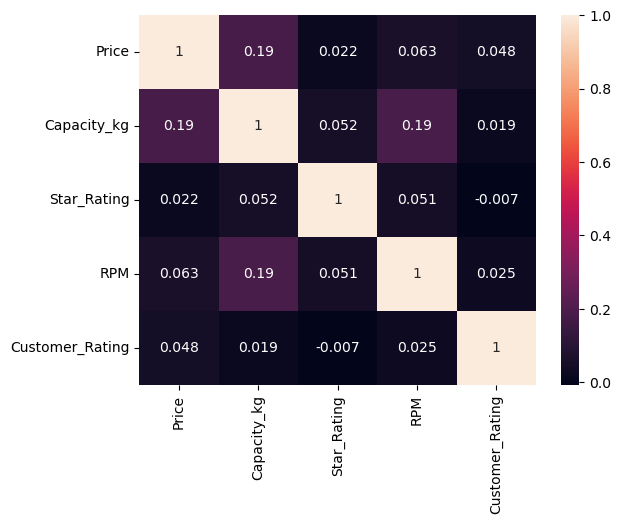

In [186]:
#Correlation heatmap between Price, Capacity (kg), Star Rating, RPM, and Customer Rating.
sns.heatmap(df[['Price','Capacity_kg','Star_Rating','RPM','Customer_Rating']].corr(),annot = True)

In [187]:
#Visualizations

In [190]:
#Bar plot — Top 10 brands by average price.
avg_price = df.groupby('Brand')['Price'].mean().sort_values(ascending = False).head(10)

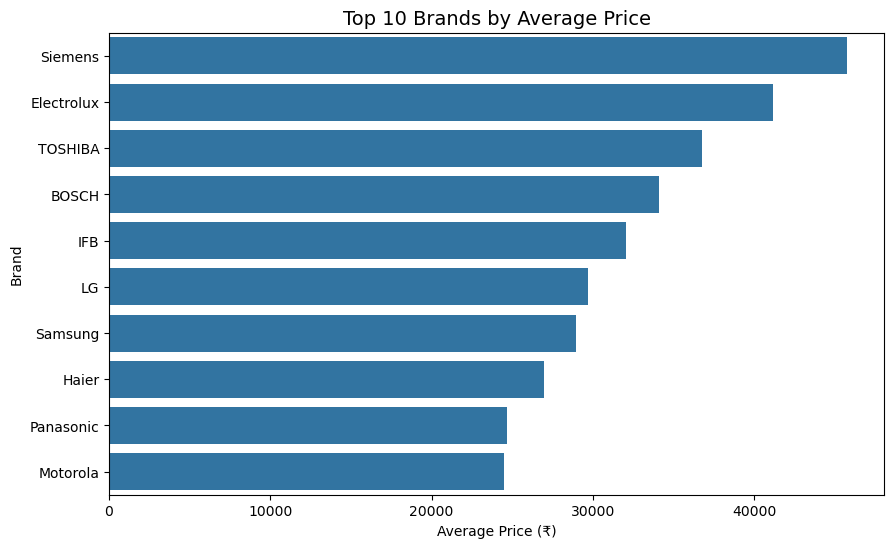

In [193]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title("Top 10 Brands by Average Price", fontsize=14)
plt.xlabel("Average Price (₹)")
plt.ylabel("Brand")
plt.show()

<Axes: ylabel='Price'>

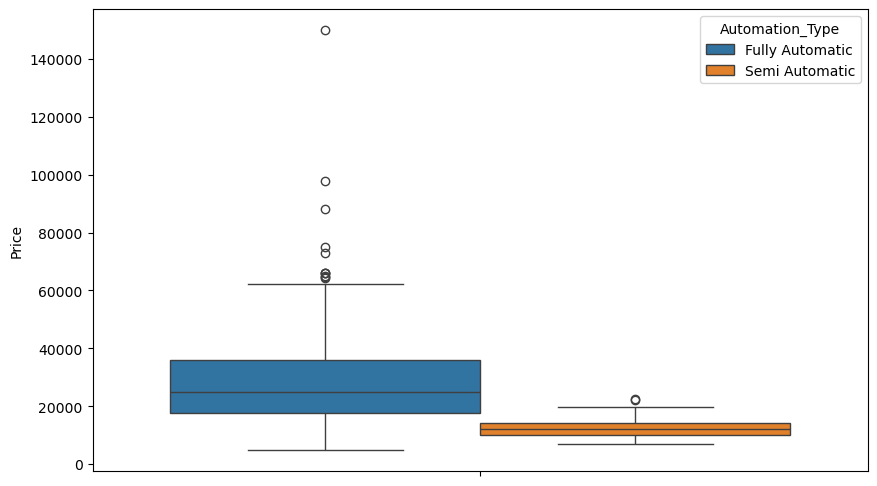

In [196]:
#Boxplot — Price variation across different Automation Types
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='Price',hue='Automation_Type')

<Axes: xlabel='Price', ylabel='Capacity_kg'>

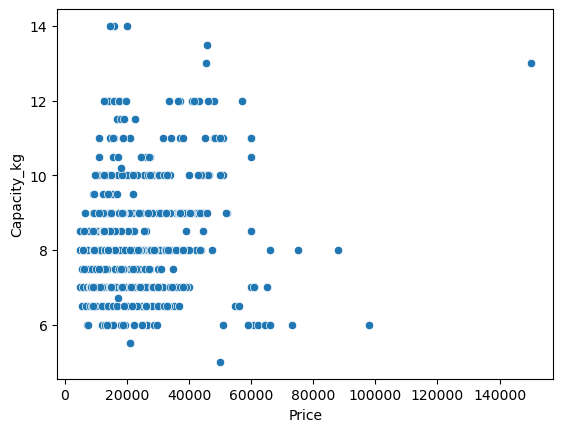

In [199]:
#Scatter Plot — Price vs. Capacity (kg)
sns.scatterplot(data=df,x='Price',y='Capacity_kg')

In [201]:
#Pie chart — Percentage of each Load type.
vc=df['Load_Type'].value_counts()
vc

Load_Type
Top Load      598
Front Load    143
Name: count, dtype: int64

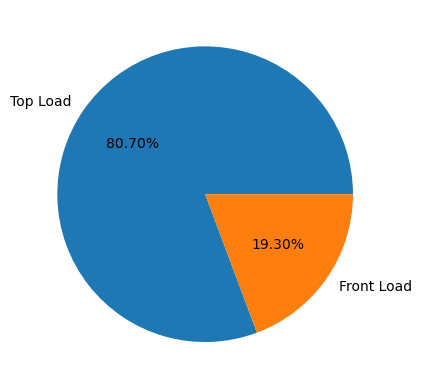

In [204]:
plt.pie(vc.values,labels=vc.index,autopct='%.2f%%')
plt.show()